In [1]:
import tensorflow as tf
import imageio
import os
from PIL import Image
import pandas as pd
import numpy as np

In [2]:
tr = pd.read_csv('Ytr.txt')
te = pd.read_csv('pred.txt')

In [22]:
Xt = np.zeros([1,200,200])
teId = tr['id'][0]
path = 'images/%05d.png' %teId
pic = imageio.imread(path)
pic = Image.fromarray(pic).resize((200,200))
#pic = np.mean(pic, axis = 2)
pic1 = np.array(pic)

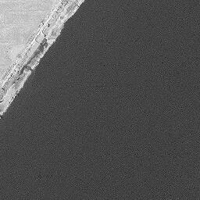

In [23]:
pic

In [24]:
pic1.shape

(200, 200, 3)

In [3]:
import albumentations as A

In [4]:
def read_image(N,D,X):
    Xt = np.zeros([N,D,D,3])
    #found = list()
    for ii in range(N):
        #if ii % 100 == 0:
            #print('%d / %d' % (ii, N))
        teId = X['id'][ii]
        path = 'images/%05d.png' %teId
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((D,D)) # NOTE : this can be improved.
        # pic = np.mean(pic,axis = 2) # NOTE: this can be improved
        pic = np.array(pic)
        # print(pic.shape)
        Xt[ii,:,:,:] = pic
    Xt = Xt/255
    return Xt

(256, 256, 3)

In [5]:
Xtr_1 = read_image(tr.shape[0],256,tr)

In [6]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (256,256,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # output neuron for number of classes
])

In [7]:
model1.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy','AUC'])

In [8]:
Xtr_1 = Xtr_1.reshape(-3,256,256,3)

In [67]:
from sklearn.model_selection import train_test_split
X1,X_val1,y1,y_val1 = train_test_split(Xtr_1,np.array(tr['label']),test_size = 0.2, random_state = 42)


In [86]:
model1.fit(X1,y1, validation_data = (X_val1,y_val1),epochs = 15)

Epoch 1/15
91/91 [==============================] - 4s 35ms/step - loss: 0.8873 - accuracy: 0.5951 - auc: 0.4980 - val_loss: 0.6698 - val_accuracy: 0.6231 - val_auc: 0.4269
Epoch 2/15
91/91 [==============================] - 3s 29ms/step - loss: 0.6890 - accuracy: 0.6072 - auc: 0.5021 - val_loss: 0.6570 - val_accuracy: 0.6231 - val_auc: 0.5378
Epoch 3/15
91/91 [==============================] - 3s 29ms/step - loss: 0.6706 - accuracy: 0.6127 - auc: 0.5379 - val_loss: 0.6739 - val_accuracy: 0.6231 - val_auc: 0.6103
Epoch 4/15
91/91 [==============================] - 3s 29ms/step - loss: 0.6656 - accuracy: 0.6164 - auc: 0.5993 - val_loss: 0.6445 - val_accuracy: 0.6410 - val_auc: 0.6568
Epoch 5/15
91/91 [==============================] - 3s 29ms/step - loss: 0.6403 - accuracy: 0.6299 - auc: 0.6318 - val_loss: 0.6109 - val_accuracy: 0.6671 - val_auc: 0.6831
Epoch 6/15
91/91 [==============================] - 3s 30ms/step - loss: 0.6230 - accuracy: 0.6639 - auc: 0.6858 - val_loss: 0.6440 - v

In [33]:
model.fit(Xtr_2,np.array(tr['label']), epochs = 30)

Epoch 1/30
114/114 [==============================] - 8s 17ms/step - loss: 0.8018 - accuracy: 0.6021
Epoch 2/30
114/114 [==============================] - 2s 16ms/step - loss: 0.6931 - accuracy: 0.6181 0s - loss: 0.7000 - accu
Epoch 3/30
114/114 [==============================] - 2s 16ms/step - loss: 0.6586 - accuracy: 0.6225
Epoch 4/30
114/114 [==============================] - 2s 16ms/step - loss: 0.6434 - accuracy: 0.6398
Epoch 5/30
114/114 [==============================] - 2s 16ms/step - loss: 0.6212 - accuracy: 0.6541
Epoch 6/30
114/114 [==============================] - 2s 16ms/step - loss: 0.6014 - accuracy: 0.6747
Epoch 7/30
114/114 [==============================] - 2s 16ms/step - loss: 0.5878 - accuracy: 0.6929
Epoch 8/30
114/114 [==============================] - 2s 16ms/step - loss: 0.5643 - accuracy: 0.7047
Epoch 9/30
114/114 [==============================] - 2s 16ms/step - loss: 0.5180 - accuracy: 0.7411
Epoch 10/30
114/114 [==============================] - 2s 16ms/ste

In [18]:
Xte_1 = read_image(te.shape[0],256,te)
Xte_2 = Xte_1.reshape(-3,256,256,3)

MemoryError: Unable to allocate 3.68 GiB for an array with shape (2514, 256, 256, 3) and data type float64

In [35]:
pred = model.predict(Xte_2)

In [36]:
te1 = te.copy()

In [37]:
te1['score'] = pred

In [38]:
te1.to_csv('pred5.csv',index = False)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # output neuron for number of classes
])

In [40]:
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [44]:
model.fit(Xtr_2,np.array(tr['label']), epochs = 75)

Epoch 1/75
114/114 [==============================] - 3s 20ms/step - loss: 0.4200 - accuracy: 0.8214 0s - loss: 0.4212 - accuracy: 
Epoch 2/75
114/114 [==============================] - 2s 20ms/step - loss: 0.4031 - accuracy: 0.8376
Epoch 3/75
114/114 [==============================] - 2s 20ms/step - loss: 0.3995 - accuracy: 0.8429
Epoch 4/75
114/114 [==============================] - 2s 20ms/step - loss: 0.3894 - accuracy: 0.8500
Epoch 5/75
114/114 [==============================] - 2s 20ms/step - loss: 0.3426 - accuracy: 0.8676
Epoch 6/75
114/114 [==============================] - 2s 20ms/step - loss: 0.3087 - accuracy: 0.8742
Epoch 7/75
114/114 [==============================] - 2s 20ms/step - loss: 0.2915 - accuracy: 0.8897
Epoch 8/75
114/114 [==============================] - 2s 20ms/step - loss: 0.2966 - accuracy: 0.8941
Epoch 9/75
114/114 [==============================] - 2s 20ms/step - loss: 0.2703 - accuracy: 0.9040
Epoch 10/75
114/114 [==============================] - 2s 20

In [45]:
pred = model.predict(Xte_2)

In [46]:
te1 = te.copy()
te1['score'] = pred
te1.to_csv('pred6.csv',index = False)

In [87]:
testaug = A.RandomCrop(width = 256, height = 256)(image = pic1)['image']

(256, 256, 3)

In [73]:
# inspired by https://towardsdatascience.com/fast-feature-engineering-in-python-image-data-5d3a8a7bf616

def read_augimage(N,D,X):
    Xt = np.zeros([N,D,D,3])
    #found = list()
    for ii in range(0,N,4):
        #if ii % 100 == 0:
            #print('%d / %d' % (ii, N))
        teId = X['id'][ii]
        path = 'images/%05d.png' %teId
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((D,D)) # NOTE : this can be improved.
        # pic = np.mean(pic,axis = 2) # NOTE: this can be improved
        pic1 = np.array(pic)
        pic2 = A.RandomCrop(width = 256, height = 256)(image = pic1)
        pic3 = A.GaussianBlur(p=0.8)(image=pic1)
        pic4 = A.Flip(0.8)(image=pic1)
        # print(pic.shape)
        Xt[ii,:,:,:] = pic1
        Xt[ii+1,:,:,:] = pic2
        Xt[ii+2,:,:,:] = pic3
        Xt[ii+3,:,:,:] = pic4
    Xt = Xt/255
    return Xt

In [10]:
# inspired by https://towardsdatascience.com/fast-feature-engineering-in-python-image-data-5d3a8a7bf616

def read_augimage1(N,D,X):
    Xt = np.zeros([N,D,D,3])
    #found = list()
    for ii in range(N):
        #if ii % 100 == 0:
            #print('%d / %d' % (ii, N))
        teId = X['id'][ii]
        path = 'images/%05d.png' %teId
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((D,D)) # NOTE : this can be improved.
        # pic = np.mean(pic,axis = 2) # NOTE: this can be improved
        pic1 = np.array(pic)
        pic2 = A.RandomCrop(width = 200, height = 200)(image = pic1)['image']
        pic2 = np.array(Image.fromarray(pic2).resize((D,D)))
        #pic3 = A.GaussianBlur(p=0.8)(image=pic1)
        #pic4 = A.Flip(0.8)(image=pic1)
        # print(pic.shape)
        #Xt[ii,:,:,:] = pic1
        Xt[ii,:,:,:] = pic2
        #Xt[ii+2,:,:,:] = pic3
        #Xt[ii+3,:,:,:] = pic4
    Xt = Xt/255
    return Xt

In [11]:
# inspired by https://towardsdatascience.com/fast-feature-engineering-in-python-image-data-5d3a8a7bf616

def read_augimage2(N,D,X):
    Xt = np.zeros([N,D,D,3])
    #found = list()
    for ii in range(N):
        #if ii % 100 == 0:
            #print('%d / %d' % (ii, N))
        teId = X['id'][ii]
        path = 'images/%05d.png' %teId
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((D,D)) # NOTE : this can be improved.
        # pic = np.mean(pic,axis = 2) # NOTE: this can be improved
        pic1 = np.array(pic)
        #pic2 = A.RandomCrop(width = 256, height = 256)(image = pic1)
        pic3 = A.GaussianBlur(p=0.8)(image=pic1)['image']
        #pic4 = A.Flip(0.8)(image=pic1)
        # print(pic.shape)
        #Xt[ii,:,:,:] = pic1
        #Xt[ii,:,:,:] = pic2
        Xt[ii,:,:,:] = pic3
        #Xt[ii+3,:,:,:] = pic4
    Xt = Xt/255
    return Xt

In [12]:
# inspired by https://towardsdatascience.com/fast-feature-engineering-in-python-image-data-5d3a8a7bf616

def read_augimage3(N,D,X):
    Xt = np.zeros([N,D,D,3])
    #found = list()
    for ii in range(N):
        #if ii % 100 == 0:
            #print('%d / %d' % (ii, N))
        teId = X['id'][ii]
        path = 'images/%05d.png' %teId
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((D,D)) # NOTE : this can be improved.
        # pic = np.mean(pic,axis = 2) # NOTE: this can be improved
        pic1 = np.array(pic)
        #pic2 = A.RandomCrop(width = 256, height = 256)(image = pic1)
        #pic3 = A.GaussianBlur(p=0.8)(image=pic1)
        pic4 = A.Flip(0.8)(image=pic1)['image']
        # print(pic.shape)
        #Xt[ii,:,:,:] = pic1
        #Xt[ii,:,:,:] = pic2
        #Xt[ii+2,:,:,:] = pic3
        Xt[ii,:,:,:] = pic4
    Xt = Xt/255
    return Xt

In [25]:
A.RandomCrop(width = 256, height = 256)(image = Xtr_1)['image'].shape

(256, 256, 256, 3)

In [22]:
aug_X1 = read_augimage1(tr.shape[0],256,tr)

MemoryError: Unable to allocate 5.32 GiB for an array with shape (3634, 256, 256, 3) and data type float64

In [15]:
aug_X2 = read_augimage2(tr.shape[0],256,tr)

MemoryError: Unable to allocate 5.32 GiB for an array with shape (3634, 256, 256, 3) and data type float64

In [16]:
aug_X3 = read_augimage3(tr.shape[0],256,tr)

MemoryError: Unable to allocate 5.32 GiB for an array with shape (3634, 256, 256, 3) and data type float64

In [ ]:
aug_X1 = aug_X1.reshape(-3,256,256,3)
aug_X2 = aug_X2.reshape(-3,256,256,3)
aug_X3 = aug_X3.reshape(-3,256,256,3)

In [18]:
from sklearn.model_selection import train_test_split
X1,X_val1,y1,y_val1 = train_test_split(aug_X1,np.array(tr['label']),test_size = 0.2, random_state = 42)
X2,X_val2,y2,y_val2 = train_test_split(aug_X2,np.array(tr['label']),test_size = 0.2, random_state = 42)
X3,X_val3,y3,y_val3 = train_test_split(aug_X3,np.array(tr['label']),test_size = 0.2, random_state = 42)

In [19]:
model1.fit(X1,y1, validation_data = (X_val1,y_val1),epochs = 15)

Epoch 1/15
91/91 [==============================] - 21s 95ms/step - loss: 0.9185 - accuracy: 0.6044 - auc: 0.4986 - val_loss: 0.6817 - val_accuracy: 0.6231 - val_auc: 0.5676
Epoch 2/15
91/91 [==============================] - 3s 28ms/step - loss: 0.6953 - accuracy: 0.6106 - auc: 0.5259 - val_loss: 0.6539 - val_accuracy: 0.6231 - val_auc: 0.5939
Epoch 3/15
91/91 [==============================] - 3s 28ms/step - loss: 0.6748 - accuracy: 0.6140 - auc: 0.5486 - val_loss: 0.6554 - val_accuracy: 0.6231 - val_auc: 0.5990
Epoch 4/15
91/91 [==============================] - 3s 28ms/step - loss: 0.6666 - accuracy: 0.6154 - auc: 0.5825 - val_loss: 0.6266 - val_accuracy: 0.6231 - val_auc: 0.6530
Epoch 5/15
91/91 [==============================] - 3s 28ms/step - loss: 0.6518 - accuracy: 0.6257 - auc: 0.6111 - val_loss: 0.6721 - val_accuracy: 0.5846 - val_auc: 0.6583
Epoch 6/15
91/91 [==============================] - 3s 28ms/step - loss: 0.6196 - accuracy: 0.6588 - auc: 0.6767 - val_loss: 0.5798 - 

In [20]:
model1.fit(X2,y2, validation_data = (X_val2,y_val2),epochs = 15)

Epoch 1/15
91/91 [==============================] - 3s 33ms/step - loss: 0.4366 - accuracy: 0.8118 - auc: 0.8734 - val_loss: 0.6545 - val_accuracy: 0.6823 - val_auc: 0.7360
Epoch 2/15
91/91 [==============================] - 3s 29ms/step - loss: 0.3720 - accuracy: 0.8325 - auc: 0.9073 - val_loss: 0.6599 - val_accuracy: 0.6657 - val_auc: 0.7324
Epoch 3/15
91/91 [==============================] - 3s 29ms/step - loss: 0.3173 - accuracy: 0.8627 - auc: 0.9347 - val_loss: 0.9610 - val_accuracy: 0.6520 - val_auc: 0.6858
Epoch 4/15
91/91 [==============================] - 3s 29ms/step - loss: 0.2690 - accuracy: 0.8940 - auc: 0.9535 - val_loss: 0.8796 - val_accuracy: 0.6974 - val_auc: 0.7202
Epoch 5/15
91/91 [==============================] - 3s 29ms/step - loss: 0.2467 - accuracy: 0.8951 - auc: 0.9596 - val_loss: 0.9918 - val_accuracy: 0.6616 - val_auc: 0.7138
Epoch 6/15
91/91 [==============================] - 3s 29ms/step - loss: 0.2128 - accuracy: 0.9205 - auc: 0.9690 - val_loss: 1.2509 - v

In [21]:
model1.fit(X3,y3, validation_data = (X_val3,y_val3),epochs = 15)

Epoch 1/15
91/91 [==============================] - 3s 32ms/step - loss: 0.8580 - accuracy: 0.6804 - auc: 0.6904 - val_loss: 0.6032 - val_accuracy: 0.6657 - val_auc: 0.7316
Epoch 2/15
91/91 [==============================] - 3s 28ms/step - loss: 0.5842 - accuracy: 0.7159 - auc: 0.7571 - val_loss: 0.5396 - val_accuracy: 0.7166 - val_auc: 0.7904
Epoch 3/15
91/91 [==============================] - 3s 28ms/step - loss: 0.5043 - accuracy: 0.7516 - auc: 0.8189 - val_loss: 0.5522 - val_accuracy: 0.7180 - val_auc: 0.8056
Epoch 4/15
91/91 [==============================] - 3s 28ms/step - loss: 0.4190 - accuracy: 0.8098 - auc: 0.8806 - val_loss: 0.5534 - val_accuracy: 0.7111 - val_auc: 0.8029
Epoch 5/15
91/91 [==============================] - 3s 28ms/step - loss: 0.3379 - accuracy: 0.8555 - auc: 0.9259 - val_loss: 0.5448 - val_accuracy: 0.7373 - val_auc: 0.8041
Epoch 6/15
91/91 [==============================] - 3s 28ms/step - loss: 0.2463 - accuracy: 0.8978 - auc: 0.9605 - val_loss: 0.7138 - v

In [21]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('tr', 58288),
 ('te', 40368),
 ('Xte_2', 152),
 ('Xtr_1', 152),
 ('read_augimage1', 136),
 ('read_augimage2', 136),
 ('read_augimage3', 136),
 ('read_image', 136),
 ('A', 72),
 ('Image', 72),
 ('np', 72),
 ('pd', 72),
 ('tf', 72),
 ('model1', 48),
 ('Xte_1', 28)]

In [20]:
Xte_1= 1

In [14]:
allX = np.concatenate((Xtr_1,aug_X1,aug_X2,aug_X3),axis = 0)

NameError: name 'aug_X1' is not defined

In [34]:
y = np.concatenate((np.array(tr['label']),np.array(tr['label']),np.array(tr['label'])),axis = 0)

In [89]:
model1.fit(allX,y, epochs = 30)

Epoch 1/30
341/341 [==============================] - 11s 25ms/step - loss: 0.9221 - accuracy: 0.6044 - auc: 0.5175
Epoch 2/30
341/341 [==============================] - 8s 25ms/step - loss: 0.6285 - accuracy: 0.6578 - auc: 0.6729
Epoch 3/30
341/341 [==============================] - 9s 25ms/step - loss: 0.5884 - accuracy: 0.7060 - auc: 0.7565
Epoch 4/30
341/341 [==============================] - 8s 25ms/step - loss: 0.5432 - accuracy: 0.7324 - auc: 0.7922
Epoch 5/30
341/341 [==============================] - 8s 25ms/step - loss: 0.5127 - accuracy: 0.7478 - auc: 0.8192
Epoch 6/30
341/341 [==============================] - 8s 25ms/step - loss: 0.4744 - accuracy: 0.7755 - auc: 0.8479
Epoch 7/30
341/341 [==============================] - 8s 25ms/step - loss: 0.4306 - accuracy: 0.8019 - auc: 0.8785
Epoch 8/30
341/341 [==============================] - 8s 25ms/step - loss: 0.3646 - accuracy: 0.8406 - auc: 0.9127
Epoch 9/30
341/341 [==============================] - 8s 24ms/step - loss: 0.30

In [63]:
Xte_1 = read_image(te.shape[0],256,te)
Xte_2 = Xte_1.reshape(-3,256,256,3)

In [90]:
pred = model1.predict(Xte_2)

In [91]:
te1 = te.copy()
te1['score'] = pred
te1.to_csv('pred7.csv',index = False)

In [50]:
ii = 5
D = 256
teId = tr['id'][ii]
path = 'images/%05d.png' %teId
        
pic = imageio.imread(path)
pic = Image.fromarray(pic).resize((D,D)) # NOTE : this can be improved.
# pic = np.mean(pic,axis = 2) # NOTE: this can be improved
pic1 = np.array(pic)
pic2 = A.RandomCrop(width = 200, height = 200)(image = pic1)
pic2 = np.array(Image.fromarray(pic2['image']).resize((D,D)))
pic3 = A.GaussianBlur(p=3)(image=pic1)
pic4 = A.Flip(0.8)(image=pic1)

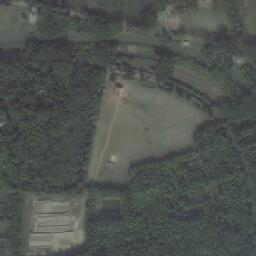

In [21]:
pic

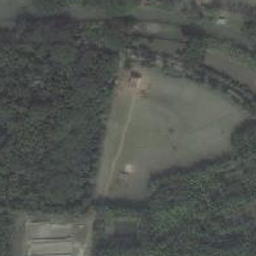

In [35]:
Image.fromarray(pic2)

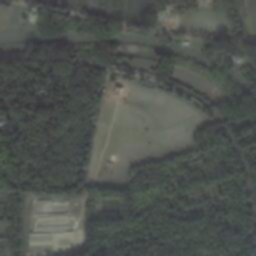

In [43]:
Image.fromarray(pic3['image'])

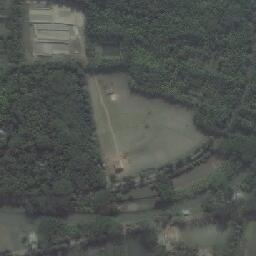

In [51]:
Image.fromarray(pic4['image'])